In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Directorio actual:", os.getcwd())
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# No truncar el DataFrame por ancho de pantalla
pd.set_option('display.width', 1000)

# No truncar las filas
pd.set_option('display.max_rows', None)

# No expandir el DataFrame en forma de bloques
pd.set_option('display.expand_frame_repr', False)

'''Feature Description:
work_year: El año en que se recogieron los datos (2024).
experience_level: El nivel de experiencia del empleado, categorizado como SE (ingeniero sénior), MI (ingeniero de nivel medio) o EN (ingeniero de nivel inicial).
employment_type: El tipo de empleo, como tiempo completo (FT), tiempo parcial (PT), contrato (C) o autónomo (F).
job_title: El título o función del empleado dentro de la empresa, por ejemplo, ingeniero de inteligencia artificial.
salary: El salario del empleado en la moneda local (por ejemplo, 202 730 USD).
salary_currency: La moneda en la que está denominado el salario (por ejemplo, USD).
salary_in_usd:El salario convertido a dólares estadounidenses para fines de estandarización.
employee_residence: El país de residencia del empleado.
remote_ratio: La proporción que indica el alcance del trabajo remoto permitido en el puesto (0 para ningún trabajo remoto, 1 para completamente remoto).
company_location: La ubicación de la empresa donde trabaja el empleado.
company_size:El tamaño de la empresa, a menudo categorizado por el número de empleados (S para pequeña, M para mediana, L para grande).'''

url='C:\Proyecto_data_science\salaries (2).csv'
df=pd.read_csv(url,sep=',')
df['ID']=range(1,len(df)+1)
df.set_index('ID', inplace=True)
print(df.head(5))
print("\n"*2)

# Chequeo de datos nulos
miss_df= df.isnull().sum()
print(miss_df)
print("\n"*2)

# Chequeo de salarios "0"
miss_0_df= (df[['salary_in_usd']]==0).sum()
print(miss_0_df)
print("\n"*2)

#Chequeo de tipos de datos
df.info()
print("\n")
convert_category= ['salary_currency','experience_level','employment_type','employee_residence','remote_ratio','company_location','company_size']
df[convert_category]=df[convert_category].astype('category')
df.info()

#Ordenar data
job_titles = df['job_title'].value_counts()
print(job_titles)
remplazar=['Data Science Manager','Data Science','Data Science Consultant','Principal Data Scientist','Lead Data Scientist','Head of Data Science ','Applied Data Scientist','Data Science Engineer','Director of Data Science']
df['job_title'] = df['job_title'].replace(remplazar, 'Data Scientist')
remplazar1=['Data Analytics Manager','BI Data Analyst','Data Analytics Lead','BI Analyst','Data Analytics Manager','Business Data Analyst']
df['job_title'] = df['job_title'].replace(remplazar1, 'Data Analyst')
remplazar2=['Machine Learning Scientist','Machine Learning Developer','Applied Machine Learning Scientist','Machine Learning Software Engineer','Machine Learning Researcher','Machine Learning Infrastructure Engineer','ML Engineer']
df['job_title'] = df['job_title'].replace(remplazar2, 'Machine Learning Engineer')




Directorio actual: c:\Proyecto_Coder
    work_year experience_level employment_type                  job_title  salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
ID                                                                                                                                                                             
1        2024               SE              FT                AI Engineer  202730             USD         202730                 US             0               US            M
2        2024               SE              FT                AI Engineer   92118             USD          92118                 US             0               US            M
3        2024               SE              FT              Data Engineer  130500             USD         130500                 US             0               US            M
4        2024               SE              FT              Data Engineer   96000  

In [149]:
#Agrupar datos para crear grafico de hipotesis 1: La experiencia influye en los salarios

info_data=['Data Scientist','Data Analyst','Machine Learning Engineer','Data Engineer']
df_data=df[df['job_title'].isin(info_data)].copy()
df_data.reset_index(drop=True, inplace=True)
miss_null_df= (df_data[['job_title']].isnull()).sum()
print(miss_null_df)
print(df_data['job_title'].unique())
df_data['job_title'] = df_data['job_title'].astype('category')
print("\n"*2)

#Promediar salarios por experiencia laboral y funcion de empleado
promedio_salarios_exp= df_data.groupby(['experience_level','job_title'], observed=False)['salary_in_usd'].mean().reset_index()
print(promedio_salarios_exp)
print("\n"*2)

#agrupar promedios de distintas funciones
df_analys=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Analyst'].reset_index(drop=True)
df_ml=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Machine Learning Engineer'].reset_index(drop=True)
df_engy=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Engineer'].reset_index(drop=True)
df_scien=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Scientist'].reset_index(drop=True)
print(df_analys)

'''
#Agrupar datos para crear grafico de hipotesis 2: Los roles influye en los salarios

promedio_salarios_emp=df_data.groupby('company_size', observed=False).agg(num_trabajadores=('work_year', 'size'),promedio_salario=('salary_in_usd', 'mean')).reset_index()
print(promedio_salarios_rol)
print("\n"*2)
'''

job_title    0
dtype: int64
['Data Engineer' 'Machine Learning Engineer' 'Data Analyst'
 'Data Scientist']



   experience_level                  job_title  salary_in_usd
0                EN               Data Analyst   84316.939286
1                EN              Data Engineer   94049.022901
2                EN             Data Scientist   85960.031414
3                EN  Machine Learning Engineer  104691.328571
4                EX               Data Analyst  116546.296296
5                EX              Data Engineer  194541.606452
6                EX             Data Scientist  206958.984375
7                EX  Machine Learning Engineer  226009.615385
8                MI               Data Analyst   99516.296353
9                MI              Data Engineer  120492.150502
10               MI             Data Scientist  127979.018868
11               MI  Machine Learning Engineer  162607.037940
12               SE               Data Analyst  123432.874633
13               SE   

'\n#Agrupar datos para crear grafico de hipotesis 2: Los roles influye en los salarios\n\npromedio_salarios_emp=df_data.groupby(\'company_size\', observed=False).agg(num_trabajadores=(\'work_year\', \'size\'),promedio_salario=(\'salary_in_usd\', \'mean\')).reset_index()\nprint(promedio_salarios_rol)\nprint("\n"*2)\n'

Text(0.02, 0.5, 'Salarios en USDT')

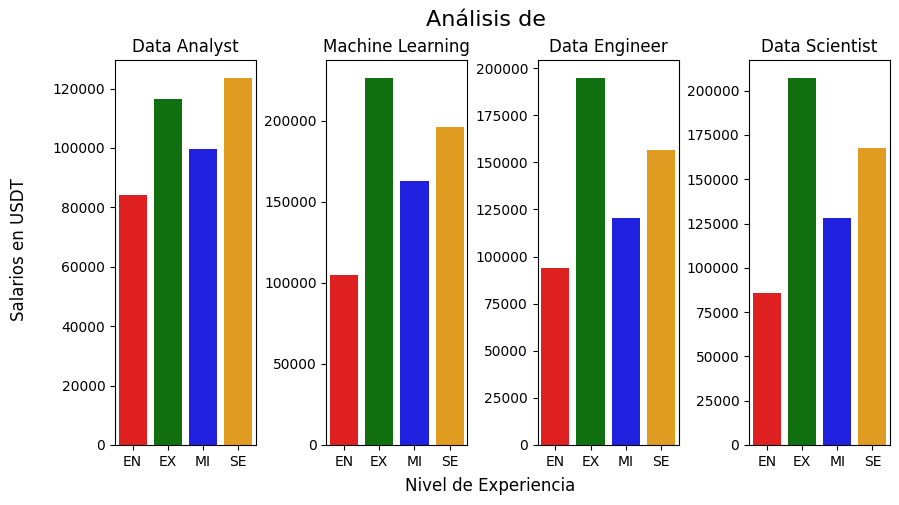

In [169]:
#Graficar Hipotesis 1
fig,axs=plt.subplots(1,4,figsize=(10,5))
p_paleta = ['red','green','blue','orange']
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_analys, palette=p_paleta, legend=False,ax=axs[0])
axs[0].set_title('Data Analyst')
axs[0].set_xlabel(' ')
axs[0].set_ylabel(' ')
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_ml, palette=p_paleta, legend=False,ax=axs[1])
axs[1].set_title('Machine Learning')
axs[1].set_xlabel(' ')
axs[1].set_ylabel(' ')
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_engy, palette=p_paleta, legend=False,ax=axs[2])
axs[2].set_title('Data Engineer')
axs[2].set_xlabel(' ')
axs[2].set_ylabel(' ')
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_scien, palette=p_paleta, legend=False,ax=axs[3])
axs[3].set_title('Data Scientist')
axs[3].set_xlabel(' ')
axs[3].set_ylabel(' ')
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Análisis de ', fontsize=16)
fig.supxlabel('Nivel de Experiencia')
fig.supylabel('Salarios en USDT')


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

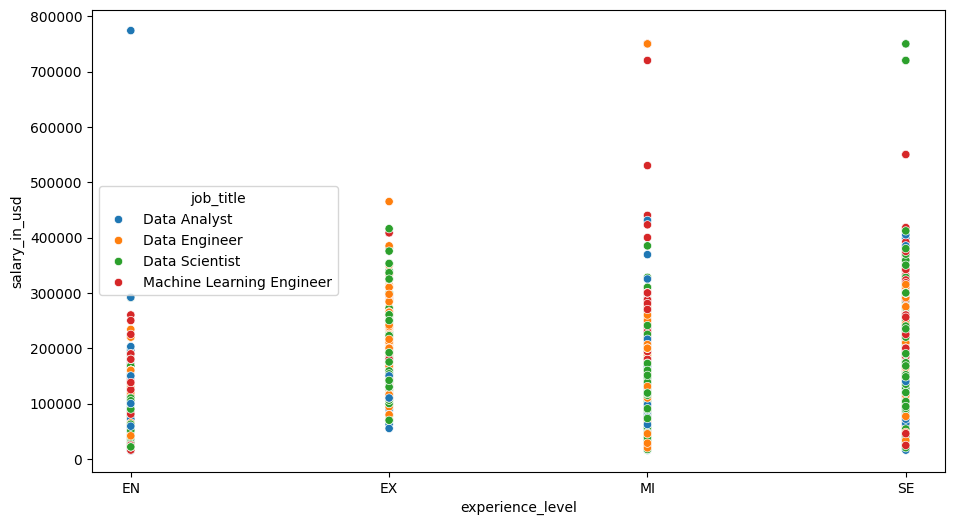

In [170]:
fig, ax=plt.subplots(figsize=(11,6))
sns.scatterplot(y='salary_in_usd',x='experience_level',hue='job_title' ,data=df_data)